## Synthetic Credit Card Approval

## For Statsly Analytics
### By Apurva Acharya

**Problem Statement:**
  Synthetic Credit Card a are computer-generated credit data that refer to the same client/product characteristicstracked by a production system, adopt the same credit lifecycle typology (possible events and measuredelements), conform to the actual schema (data template) that is being emulated, and have the same or similarstatistical properties as the credit data set that is being emulated.
  
The company wants to automate the synthetic credit card approving process (real-time) based on customerdetail provided. Given the data predict whether the customer should be approved for a synthetic credit card.


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Import dataset

In [2]:
data = pd.read_csv("D:\synthetic_credit_card_approval.csv")
data.head()

,Num_Children,Group,Income,Own_Car,Own_Housing,Target
0,4,0,36151,0,0,0
1,0,0,36095,1,0,0
2,2,1,62110,1,1,0
3,0,1,73644,1,0,0
4,3,0,99146,0,0,1


In [3]:
data.shape

(500000, 6)

The dataset has 500000 rows and 6 columns.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Num_Children  500000 non-null  int64
 1   Group         500000 non-null  int64
 2   Income        500000 non-null  int64
 3   Own_Car       500000 non-null  int64
 4   Own_Housing   500000 non-null  int64
 5   Target        500000 non-null  int64
dtypes: int64(6)
memory usage: 22.9 MB


In [5]:
data.columns

Index(['Num_Children', 'Group', 'Income', 'Own_Car', 'Own_Housing', 'Target'], dtype='object')

In [6]:
data.describe()

,Num_Children,Group,Income,Own_Car,Own_Housing,Target
count,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000,500000.000000
mean,2.000346,0.50065,72507.446898,0.700930,0.401612,0.386626
std,1.410574,0.50000,22960.209440,0.457851,0.490225,0.486977
min,0.000000,0.00000,30000.000000,0.000000,0.000000,0.000000
25%,1.000000,0.00000,53321.000000,0.000000,0.000000,0.000000
50%,2.000000,1.00000,72060.000000,1.000000,0.000000,0.000000
75%,3.000000,1.00000,90670.250000,1.000000,1.000000,1.000000
max,11.000000,1.00000,119999.000000,1.000000,1.000000,1.000000


In [7]:
data.isnull().sum()

Num_Children    0
Group           0
Income          0
Own_Car         0
Own_Housing     0
Target          0
dtype: int64

There are no null values in the data.

### Looking for and dropping duplicates

In [8]:
dup=data.duplicated().sum()
print(dup)

49202


In [9]:
data.drop_duplicates(keep="first",inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450798 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Num_Children  450798 non-null  int64
 1   Group         450798 non-null  int64
 2   Income        450798 non-null  int64
 3   Own_Car       450798 non-null  int64
 4   Own_Housing   450798 non-null  int64
 5   Target        450798 non-null  int64
dtypes: int64(6)
memory usage: 24.1 MB


Now the data has 450798 rows and  columns.

<AxesSubplot:xlabel='count', ylabel='Target'>

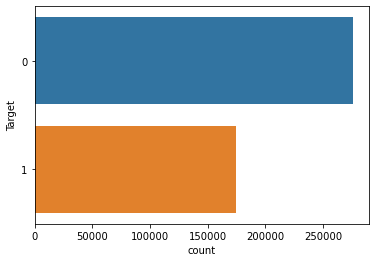

In [11]:
sns.countplot(data=data,y='Target')

<AxesSubplot:xlabel='Num_Children', ylabel='count'>

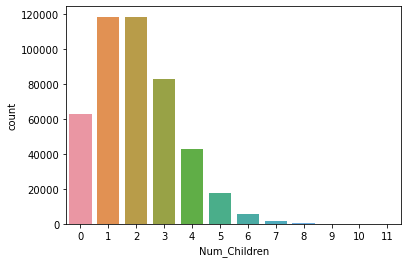

In [12]:
sns.countplot(x = 'Num_Children', data = data)

<AxesSubplot:xlabel='Own_Housing', ylabel='count'>

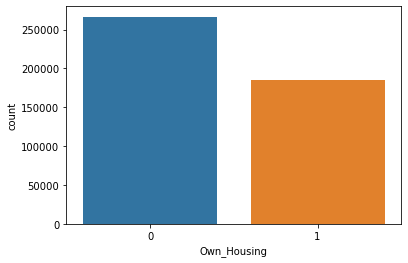

In [13]:
sns.countplot(x = 'Own_Housing', data = data)

<AxesSubplot:xlabel='Own_Car', ylabel='count'>

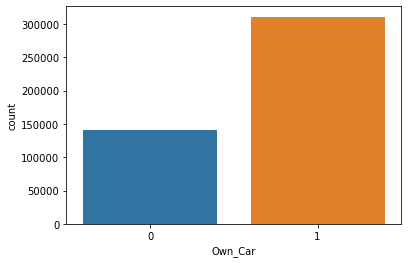

In [14]:
sns.countplot(x = 'Own_Car', data = data)

In [15]:
data.Income.value_counts()

41211     16
83101     16
84256     16
83911     15
83553     15
          ..
105146     1
101598     1
68978      1
105692     1
108618     1
Name: Income, Length: 88775, dtype: int64

<AxesSubplot:ylabel='Target'>

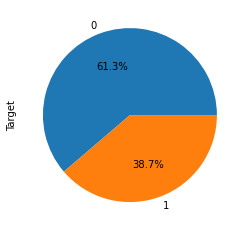

In [16]:
data['Target'].value_counts().plot(kind='pie',autopct='%1.1f%%')

38.7% people in the dataset were approved a credit card.

<AxesSubplot:ylabel='Own_Car'>

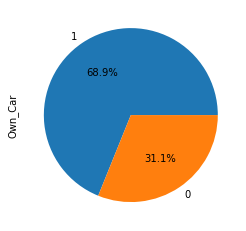

In [17]:
data['Own_Car'].value_counts().plot(kind='pie',autopct='%1.1f%%')

68.9% people in the dataset own a car.

<AxesSubplot:ylabel='Own_Housing'>

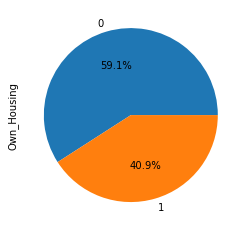

In [18]:
data['Own_Housing'].value_counts().plot(kind='pie',autopct='%1.1f%%')

40.9% people in the dataset own a house.

<AxesSubplot:>

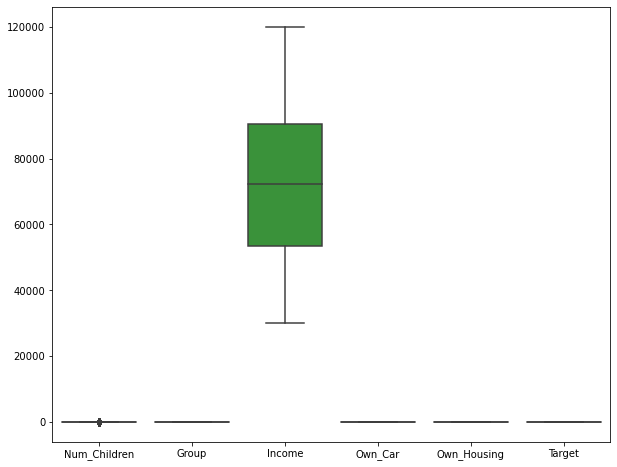

In [19]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data)

There seem no significant outliers in the data.

<AxesSubplot:xlabel='Target', ylabel='Income'>

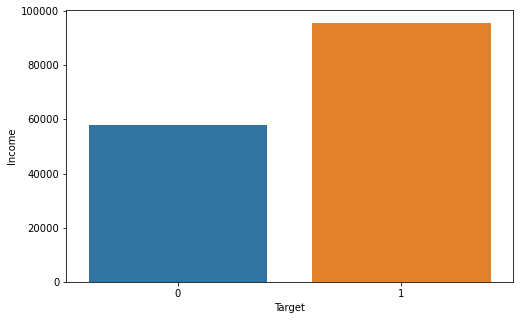

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(x='Target',y='Income',data=data)

<AxesSubplot:xlabel='Own_Car', ylabel='count'>

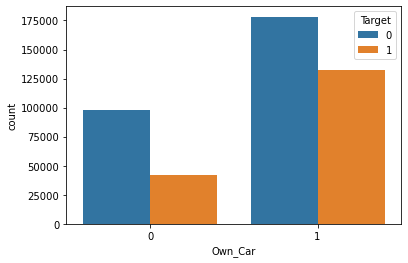

In [21]:
sns.countplot(data=data,x='Own_Car',hue='Target')

<AxesSubplot:xlabel='Own_Housing', ylabel='count'>

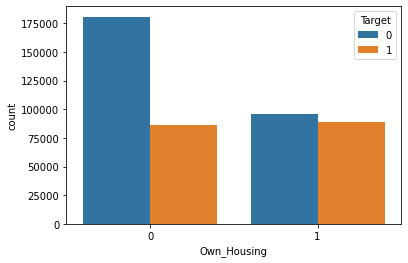

In [22]:
sns.countplot(data=data,x='Own_Housing',hue='Target')

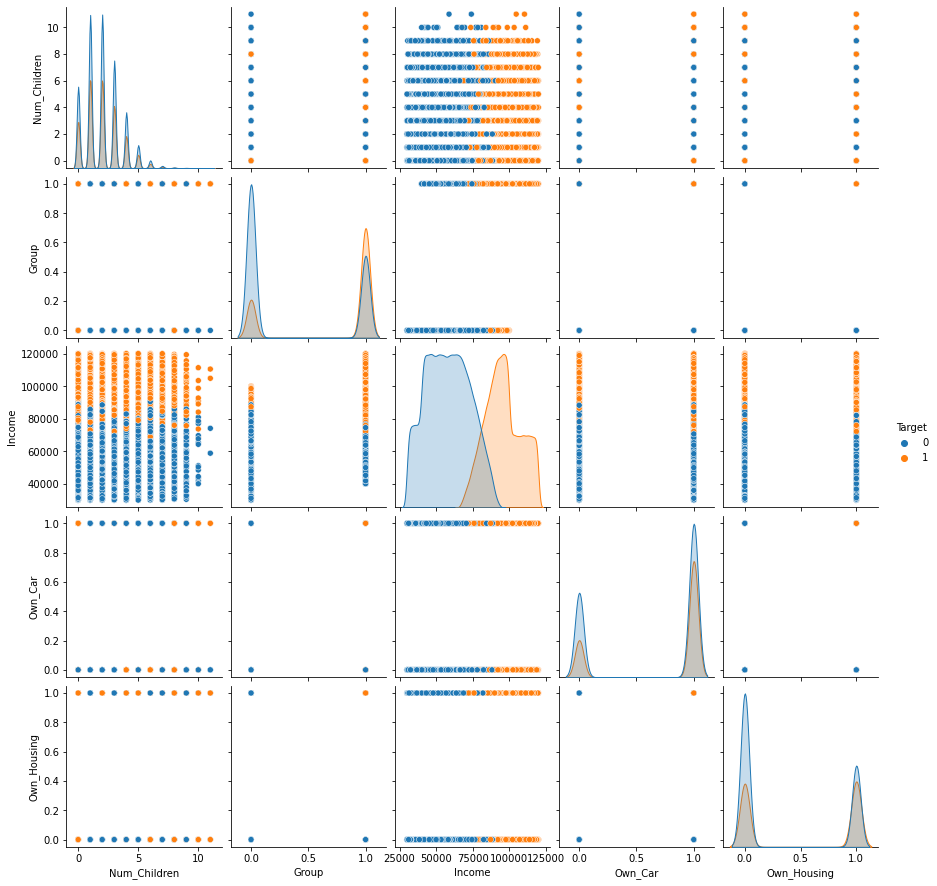

In [23]:
sns.pairplot(data=data,hue='Target')

<AxesSubplot:xlabel='Income', ylabel='Own_Car'>

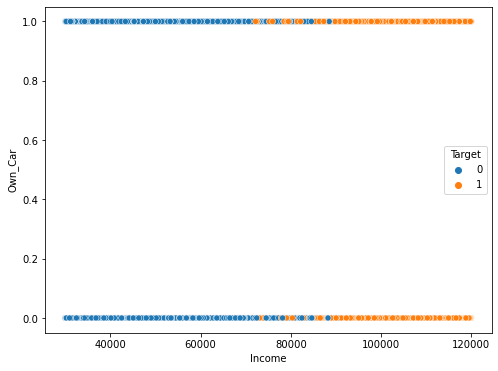

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Income',y='Own_Car',hue='Target',data=data)

<AxesSubplot:xlabel='Income', ylabel='Own_Housing'>

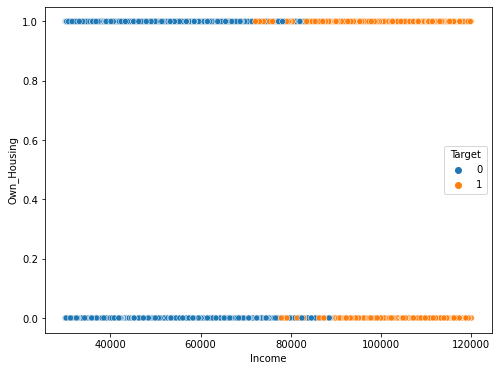

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Income',y='Own_Housing',hue='Target',data=data)

<AxesSubplot:>

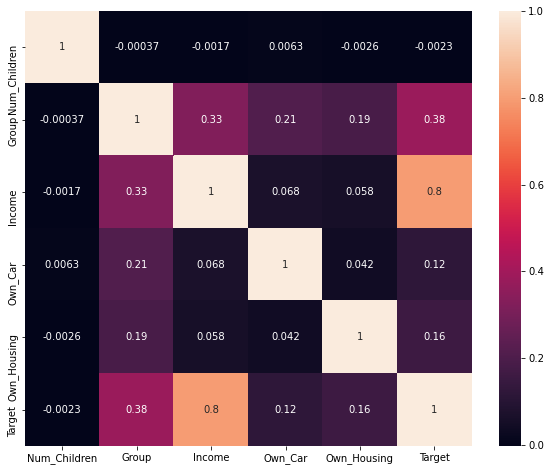

In [26]:
plt.figure(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,annot=True)

We clearly see that the Target variable is dependent on Income.

In [27]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

# determining the shape of x and y.
print(x.shape)
print(y.shape)

(450798, 5)
(450798,)


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [29]:
#MinMAxScaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [30]:
random=RandomForestClassifier()
random.fit(x_train,y_train)
# predicting the results for the test set

y_pred_train_rf=random.predict(x_train)
y_pred_rf = random.predict(x_test)
# calculating the training and testing accuracies
print("Training accuracy :", accuracy_score(y_pred_train_rf, y_train))
print("Testing accuracy :", accuracy_score(y_pred_rf, y_test))

Training accuracy : 0.997334879800227
Testing accuracy : 0.9599230996746525


In [31]:
from sklearn import metrics
print('Error rate for Train Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_train, y_pred_train_rf))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_train, y_pred_train_rf))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_rf)))

print('\n')

print('Error rate for Test Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, y_pred_rf))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

Error rate for Train Data is : 

Mean Square Error (MSE)       : 0.0026651201997731004
Mean Absolute Error           : 0.0026651201997731004
Root mean Square Error (RMSE) : 0.051624802176600156


Error rate for Test Data is : 

Mean Square Error (MSE)       : 0.04007690032534753
Mean Absolute Error           : 0.04007690032534753
Root mean Square Error (RMSE) : 0.2001921585011449


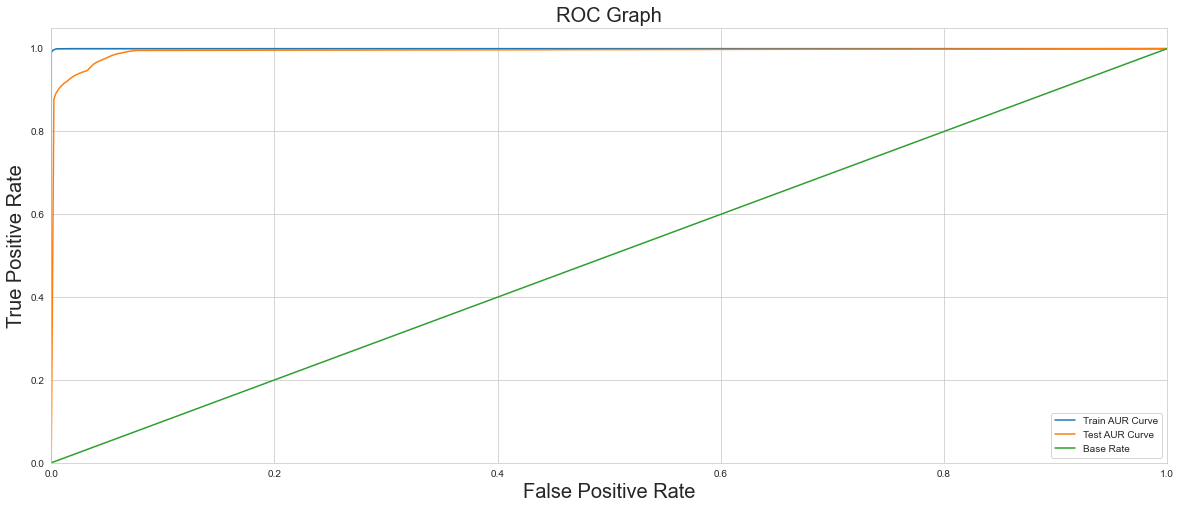

In [32]:
from sklearn.metrics import roc_curve
FPR_rf_train, TPR_rf_train, Thresholds_train = roc_curve(y_train, random.predict_proba(x_train)[:,1])
fpr_series = pd.Series(FPR_rf_train)
tpr_series = pd.Series(TPR_rf_train)
thresholds_series = pd.Series(Thresholds_train)

FPR_rf_test, TPR_rf_test, Thresholds_test = roc_curve(y_test, random.predict_proba(x_test)[:,1])
fpr_series = pd.Series(FPR_rf_test)
tpr_series = pd.Series(TPR_rf_test)
thresholds_series = pd.Series(Thresholds_test)
sns.set_style("whitegrid")
plt.figure(figsize = (20,8))
plt.plot(FPR_rf_train, TPR_rf_train, label = 'Train AUR Curve')
plt.plot(FPR_rf_test, TPR_rf_test,   label = 'Test AUR Curve')

# Plot Base Rate ROC
plt.plot([0,1], [0,1], label = 'Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate',  fontsize = 20)
plt.title('ROC Graph', fontsize = 20)
plt.legend(loc = "lower right")


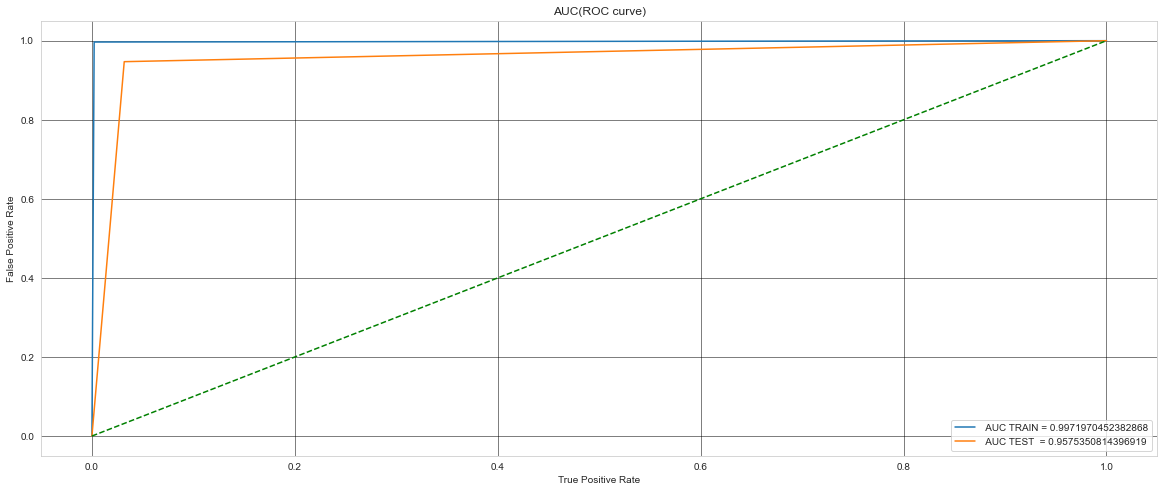

In [33]:
FPR_rf_train, TPR_rf_train, Thresholds_train = roc_curve(y_train, y_pred_train_rf)
FPR_rf_test, TPR_rf_test, Thresholds_test    = roc_curve(y_test, y_pred_rf)
from sklearn.metrics import auc
plt.figure(figsize = (20,8))
plt.grid()
plt.plot(FPR_rf_train, TPR_rf_train, label = " AUC TRAIN = "+str(auc(FPR_rf_train, TPR_rf_train)))
plt.plot(FPR_rf_test, TPR_rf_test,   label = " AUC TEST  = "+str(auc(FPR_rf_test, TPR_rf_test)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)
plt.show()

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [35]:
y_pred_dtc_train = dtc.predict(x_train)
y_pred_dtc_test  = dtc.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_dtc_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_dtc_test, y_test))

Training accuracy : 0.9973570627269789
Testing accuracy  : 0.9590431824903874


In [36]:
from sklearn import metrics
print('Error rate for Train Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_train, y_pred_dtc_train))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_train, y_pred_dtc_train))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_train, y_pred_dtc_train)))

print('\n')

print('Error rate for Test Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, y_pred_dtc_test))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_test, y_pred_dtc_test))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test,y_pred_dtc_test)))

Error rate for Train Data is : 

Mean Square Error (MSE)       : 0.0026429372730211245
Mean Absolute Error           : 0.0026429372730211245
Root mean Square Error (RMSE) : 0.051409505667931926


Error rate for Test Data is : 

Mean Square Error (MSE)       : 0.04095681750961254
Mean Absolute Error           : 0.04095681750961254
Root mean Square Error (RMSE) : 0.2023779076619099


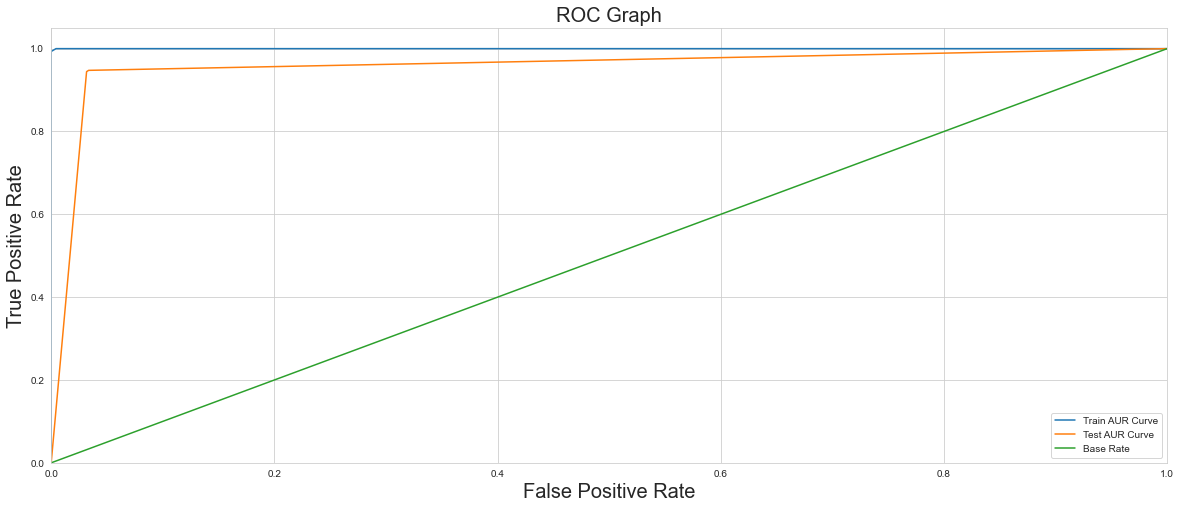

In [37]:
from sklearn.metrics import roc_curve
FPR_dtc_train, TPR_dtc_train, Thresholds_train = roc_curve(y_train, dtc.predict_proba(x_train)[:,1])
fpr_series = pd.Series(FPR_rf_train)
tpr_series = pd.Series(TPR_rf_train)
thresholds_series = pd.Series(Thresholds_train)

FPR_dtc_test, TPR_dtc_test, Thresholds_test = roc_curve(y_test, dtc.predict_proba(x_test)[:,1])
fpr_series = pd.Series(FPR_dtc_test)
tpr_series = pd.Series(TPR_dtc_test)
thresholds_series = pd.Series(Thresholds_test)
sns.set_style("whitegrid")
plt.figure(figsize = (20,8))
plt.plot(FPR_dtc_train, TPR_dtc_train, label = 'Train AUR Curve')
plt.plot(FPR_dtc_test, TPR_dtc_test,   label = 'Test AUR Curve')

# Plot Base Rate ROC
plt.plot([0,1], [0,1], label = 'Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate',  fontsize = 20)
plt.title('ROC Graph', fontsize = 20)
plt.legend(loc = "lower right")


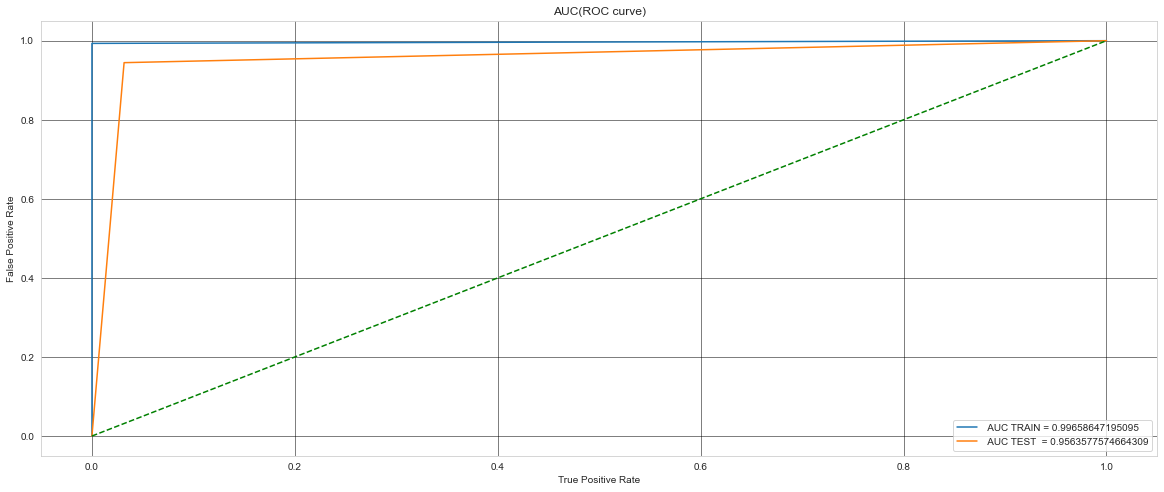

In [38]:
FPR_dtc_train, TPR_dtc_train, Thresholds_train = roc_curve(y_train,  y_pred_dtc_train)
FPR_dtc_test, TPR_dtc_test, Thresholds_test    = roc_curve(y_test,  y_pred_dtc_test)
from sklearn.metrics import auc
plt.figure(figsize = (20,8))
plt.grid()
plt.plot(FPR_dtc_train, TPR_dtc_train, label = " AUC TRAIN = "+str(auc(FPR_dtc_train, TPR_dtc_train)))
plt.plot(FPR_dtc_test, TPR_dtc_test,   label = " AUC TEST  = "+str(auc(FPR_dtc_test, TPR_dtc_test)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)


Most people that have been approved credit card have **income above 80000.**

Most people that have been approved credit card **own car.**

Most people that haven been approved credit card do not own a house.

Thus most of the approvals depend on income.